In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris=datasets.load_iris()
X= iris["data"][:,(2,3)]
y=(iris["target"]==2).astype(np.float64)

svm_clf=Pipeline([("scaler",StandardScaler()),("linear_svc",LinearSVC(C=1, loss="hinge", random_state=42))])
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [ ]:
svm_clf.predict([[4.25,1.0]])

array([0.])

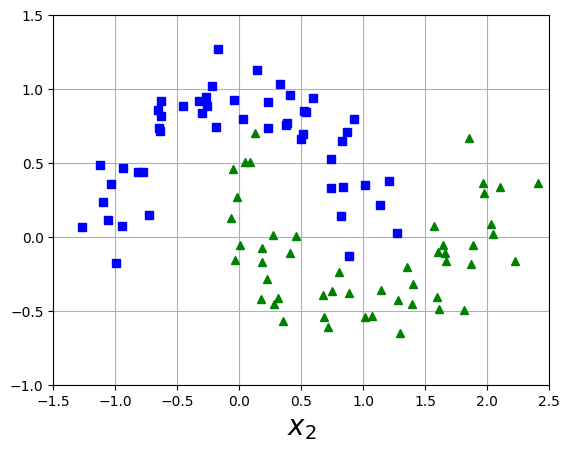

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X,y,axes):
  plt.plot(X[:, 0][y==0],X[:,1][y==0],"bs")
  plt.plot(X[:, 0][y==1],X[:,1][y==1],"g^")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.xlabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn. preprocessing import StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

polynomial_svm_clf.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

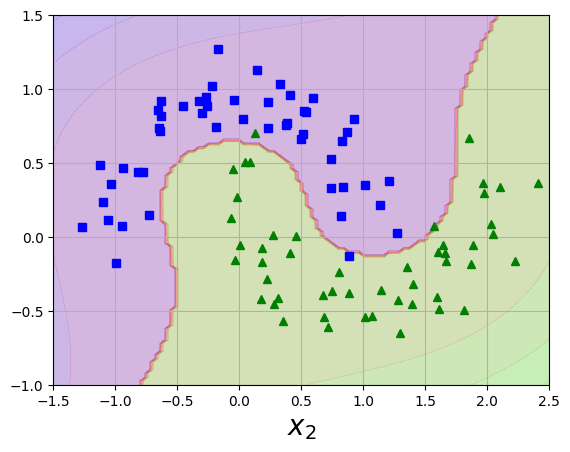

In [ ]:
import numpy as np

def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
  plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [ ]:
from sklearn.svm import SVC

ploy_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
ploy_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [ ]:
ploy100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
ploy100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

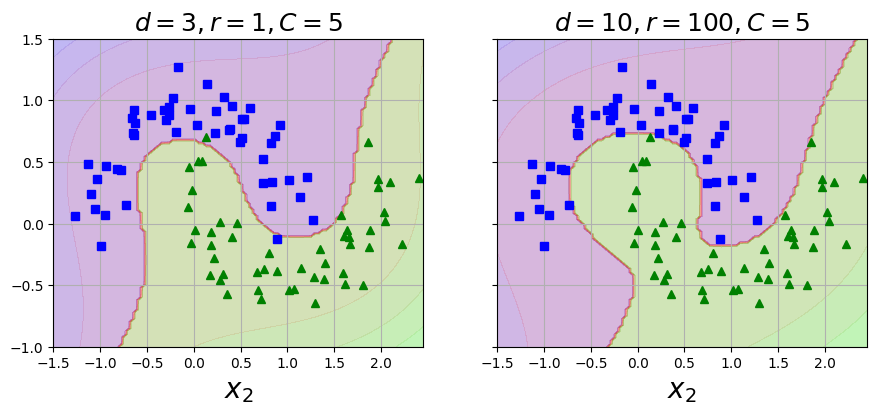

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(ploy_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$",fontsize=18)

plt.sca(axes[1])
plot_predictions(ploy100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$",fontsize=18)
plt.ylabel("")

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

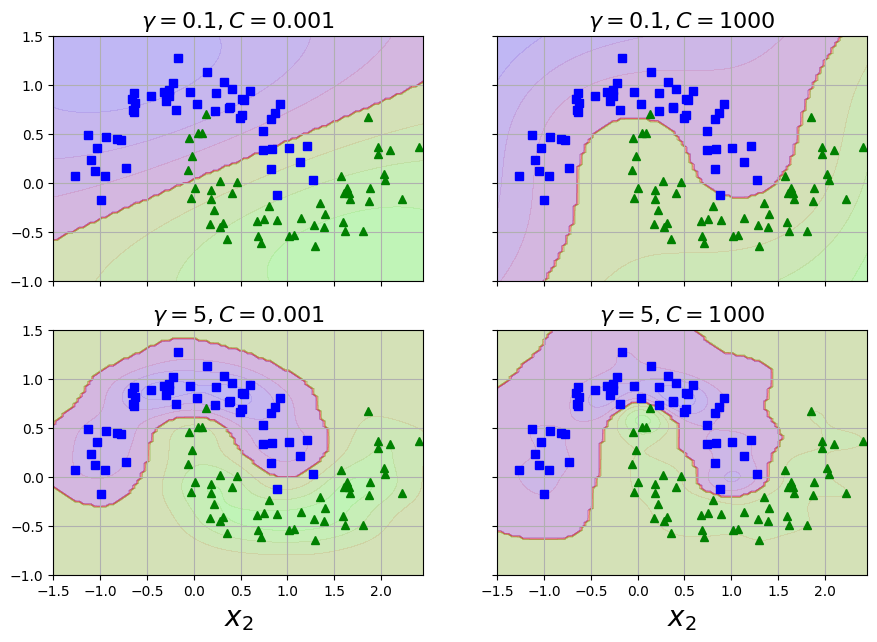

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []

for gamma, C in hyperparams:
  rbf_kernel_svm_clf = Pipeline([
      ('scaler', StandardScaler()),
      ("svm_clf", SVC(kernel='rbf', gamma=gamma, C=C))
   ])
  rbf_kernel_svm_clf.fit(X,y)
  svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
  plt.sca(axes[i // 2, i%2])
  plot_predictions(svm_clf,[-1.5, 2.45, -1, 1.5])
  plot_dataset(X,y, [-1.5, 2.45, -1, 1.5])
  gamma, C =hyperparams[i]
  plt.title("$\gamma = {}, C={}$".format(gamma, C), fontsize=16)
  if i in (0, 1):
    plt.xlabel("")
  if i in (1, 3):
    plt.ylabel("")

plt.show

In [ ]:
#SVM Regression

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
y = (4 + 3 * X + np.random.rand(m,1)).ravel()

In [ ]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [ ]:
y

array([ 7.21682534, 10.47941866,  9.33146259,  8.48677826,  5.53401182,
        5.85784136,  4.43699418,  9.39303974,  7.65191736,  8.5737658 ,
        4.51218426, 10.09080814,  9.82339335,  5.63078799,  5.37188431,
        5.64312314,  5.96637768,  7.95073557,  6.66622076,  6.73426178,
        8.44336214,  5.03567885,  5.75839001,  7.01363249,  7.44327725,
        9.44006294,  5.96931304,  7.15945128,  7.91295314,  4.39457154,
        8.50837254,  5.64644287,  4.72120758,  9.75687157, 10.10477452,
        9.17556741,  6.55728879,  5.22359016,  8.9926109 ,  7.11312989,
        4.85182366,  7.68430625,  4.96711618, 10.01719961,  6.32364707,
        8.4689293 ,  6.39299929,  7.54794915,  7.3056808 ,  5.21701816])

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

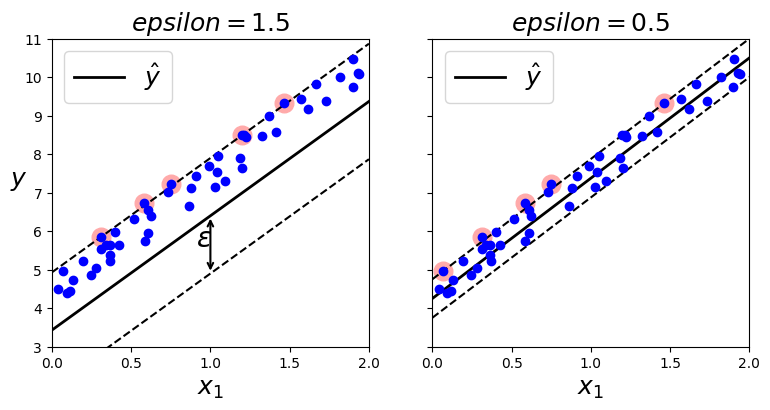

In [ ]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

def find_support_vector(svm_reg, X, y):
  y_pred = svm_reg.predict(X)
  off_margin = (np.abs(y-y_pred) >= svm_reg.epsilon)
  return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vector(svm_reg1,X,y)
svm_reg2.support_ = find_support_vector(svm_reg2,X,y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
  x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
  y_pred= svm_reg.predict(x1s)
  plt.plot(x1s, y_pred, 'k-', linewidth=2,label=r"$\hat{y}$")
  plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
  plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
  plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
  plt.plot(X,y,"bo")
  plt.xlabel(r"$x_1$", fontsize=18)
  plt.legend(loc='upper left', fontsize=18)
  plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9,4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2,3,11])
plt.title(r"$epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.annotate(
    '', xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
    textcoords='data', arrowprops={'arrowstyle':'<->', 'linewidth': 1.5}
  )

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0,2,3,11])
plt.title(r"$epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()